In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def create_tridiagonal_matrix(n, main_value, upper_value, lower_value):
    """创建三对角矩阵"""
    main_diag = np.full(n, main_value)
    upper_diag = np.full(n-1, upper_value)
    lower_diag = np.full(n-1, lower_value)
    return np.diag(main_diag, 0) + np.diag(upper_diag, 1) + np.diag(lower_diag, -1)


In [3]:
def solve_Jacobi(A, b, tolerance=1e-4, max_iterations=100000):
    """Jacobi 迭代法求解线性方程组"""
    n = len(A)
    D = np.diag(np.diag(A))
    L = -np.tril(A, -1)
    U = -np.triu(A, 1)
    D_inv = np.linalg.inv(D)
    B = D_inv @ (L + U)
    g = D_inv @ b

    x = np.zeros(n)  # 初始猜测
    for _ in range(max_iterations):
        # print(x)
        x_new = B @ x + g
        if np.linalg.norm(x_new - x, ord=np.inf) < tolerance:
            break
        x = x_new.copy()
    else:
        print(f"Warning: Jacobi method reached max iterations ({max_iterations} times).")

    return x_new


def solve_Gauss_Seidel(A, b, tolerance=1e-4, max_iterations=100000):
    """Gauss-Seidel 迭代法求解线性方程组"""
    n = len(A)
    D = np.diag(np.diag(A))
    L = -np.tril(A, -1)
    U = -np.triu(A, 1)
    D_L_inv = np.linalg.inv(D - L)
    B = D_L_inv @ U
    g = D_L_inv @ b

    x = np.zeros(n)  # 初始猜测
    for _ in range(max_iterations):
        x_new = B @ x + g
        if np.linalg.norm(x_new - x, ord=np.inf) < tolerance:
            break
        x = x_new.copy()
    else:
        print(f"Warning: Gauss-Seidel method reached max iterations ({max_iterations} times).")

    return x_new


def solve_SOR(A, b, omega, tolerance=1e-4, max_iterations=100000):
    """SOR 迭代法求解线性方程组"""
    n = len(A)
    D = np.diag(np.diag(A))
    L = -np.tril(A, -1)
    U = -np.triu(A, 1)
    D_L_inv = np.linalg.inv(D - omega*L)
    B = D_L_inv @ ((1-omega)*D + omega*U)
    g = omega * D_L_inv @ b

    x = np.zeros(n)  # 初始猜测
    for _ in range(max_iterations):
        x_new = B @ x + g
        if np.linalg.norm(x_new - x, ord=np.inf) < tolerance:
            break
        x = x_new.copy()
    else:
        print(f"Warning: SOR method (omega = {omega}) reached max iterations ({max_iterations} times).")

    return x_new


In [4]:
def func(epsilon, a, n):
    x = np.linspace(0, 1, n+1)
    y_exact = (1 - a) / (1 - np.exp(-1/epsilon)) * (1 - np.exp(-x/epsilon)) + a * x

    h = 1/n
    A = create_tridiagonal_matrix(n-1, -(2 * epsilon + h), epsilon + h, epsilon)
    b = np.full(n-1, a * h**2)
    b[-1] = a * h**2 - epsilon - h
    y_Jacobi = np.concatenate(([0], solve_Jacobi(A, b), [1]))
    y_Gauss_Seidel = np.concatenate(([0], solve_Gauss_Seidel(A, b), [1]))
    y_SOR_0 = np.concatenate(([0], solve_SOR(A, b, omega=1.1), [1]))
    y_SOR_1 = np.concatenate(([0], solve_SOR(A, b, omega=1.2), [1]))
    y_SOR_2 = np.concatenate(([0], solve_SOR(A, b, omega=1.4), [1]))
    y_SOR_3 = np.concatenate(([0], solve_SOR(A, b, omega=1.6), [1]))
    y_SOR_4 = np.concatenate(([0], solve_SOR(A, b, omega=1.8), [1]))
    print(f"epsilon = {epsilon}, a = {a}, n = {n}")
    print(f"Jacobi method:\n    error = {np.linalg.norm(y_exact - y_Jacobi, ord=np.inf)}")
    print(f"Gauss-Seidel method:\n    error = {np.linalg.norm(y_exact - y_Gauss_Seidel, ord=np.inf)}")
    print(f"SOR method (omega = 1.1):\n    error = {np.linalg.norm(y_exact - y_SOR_0, ord=np.inf)}")
    print(f"SOR method (omega = 1.2):\n    error = {np.linalg.norm(y_exact - y_SOR_1, ord=np.inf)}")
    print(f"SOR method (omega = 1.4):\n    error = {np.linalg.norm(y_exact - y_SOR_2, ord=np.inf)}")
    print(f"SOR method (omega = 1.6):\n    error = {np.linalg.norm(y_exact - y_SOR_3, ord=np.inf)}")
    print(f"SOR method (omega = 1.8):\n    error = {np.linalg.norm(y_exact - y_SOR_4, ord=np.inf)}")

    plt.figure(figsize=(12, 8))
    plt.title(f"epsilon = {epsilon}, a = {a}, n = {n}")
    plt.plot(x, y_exact, label="Exact solution")
    plt.plot(x, y_Jacobi, label="Jacobi method")
    plt.plot(x, y_Gauss_Seidel, label="Gauss-Seidel method")
    plt.plot(x, y_SOR_0, label="SOR method (omega = 1.1)")
    # plt.plot(x, y_SOR_1, label="SOR method (omega = 1.2)")
    # plt.plot(x, y_SOR_2, label="SOR method (omega = 1.4)")
    # plt.plot(x, y_SOR_3, label="SOR method (omega = 1.6)")
    # plt.plot(x, y_SOR_4, label="SOR method (omega = 1.8)")
    plt.legend()
    plt.show()


epsilon = 1, a = 0.5, n = 100
Jacobi method:
    error = 0.09511678109339439
Gauss-Seidel method:
    error = 0.09911605886431724
SOR method (omega = 1.1):
    error = 0.08114755256014955
SOR method (omega = 1.2):
    error = 0.06606228339829051
SOR method (omega = 1.4):
    error = 0.04250267010244724
SOR method (omega = 1.6):
    error = 0.024804115900267154
SOR method (omega = 1.8):
    error = 0.010914426486399065


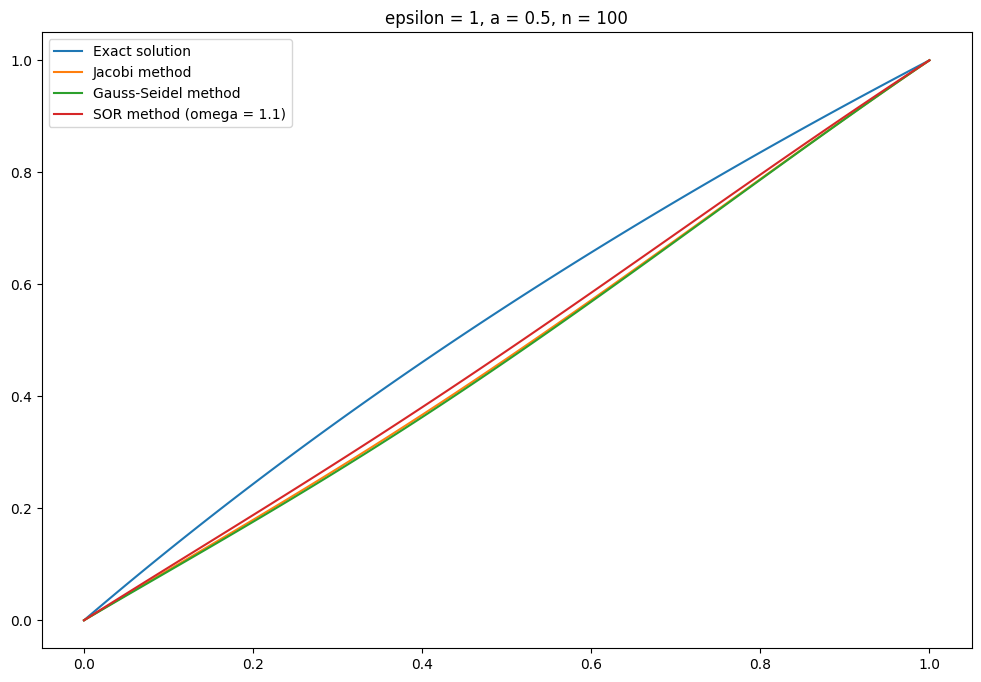

In [5]:
func(1, 1/2, 100)


epsilon = 0.1, a = 0.5, n = 100
Jacobi method:
    error = 0.036160617570468734
Gauss-Seidel method:
    error = 0.03886152879288984
SOR method (omega = 1.1):
    error = 0.03307991183456521
SOR method (omega = 1.2):
    error = 0.028417271248042553
SOR method (omega = 1.4):
    error = 0.0211632000824733
SOR method (omega = 1.6):
    error = 0.015868291209996832
SOR method (omega = 1.8):
    error = 0.011756010612271162


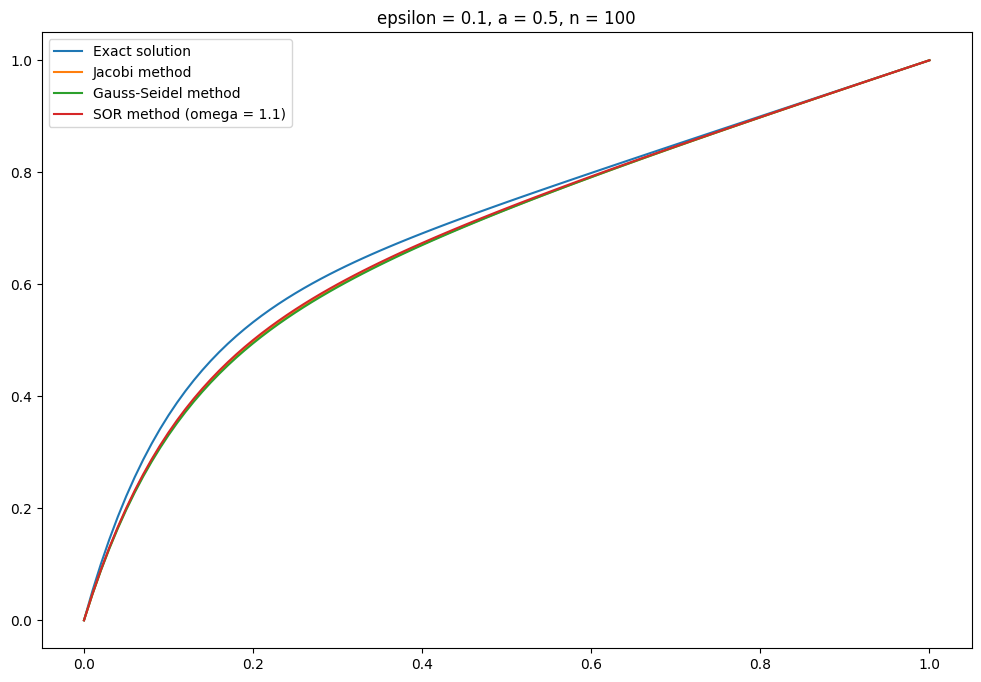

In [6]:
func(0.1, 1/2, 100)


epsilon = 0.01, a = 0.5, n = 100
Jacobi method:
    error = 0.06679675926832185
Gauss-Seidel method:
    error = 0.06680301114800802
SOR method (omega = 1.1):
    error = 0.066643562577968
SOR method (omega = 1.2):
    error = 0.0665088881797089
SOR method (omega = 1.4):
    error = 0.06626886289755202
SOR method (omega = 1.6):
    error = 0.06614070887132667
SOR method (omega = 1.8):
    error = 0.06612900287207102


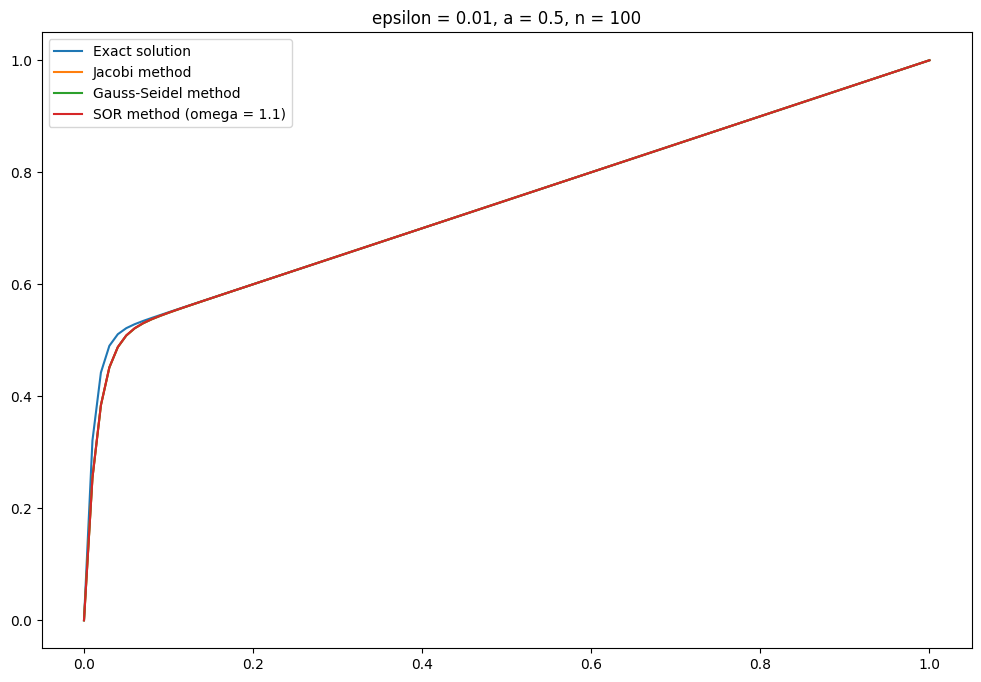

In [7]:
func(0.01, 1/2, 100)


epsilon = 0.0001, a = 0.5, n = 100
Jacobi method:
    error = 0.005062605031822542
Gauss-Seidel method:
    error = 0.004966504772652369
SOR method (omega = 1.1):
    error = 0.004943380465792679
SOR method (omega = 1.2):
    error = 0.005036050702318828
SOR method (omega = 1.4):
    error = 8.147768115553811e+16
SOR method (omega = 1.6):
    error = 1.4454598126578751e+37
SOR method (omega = 1.8):
    error = 1.610292129253221e+55


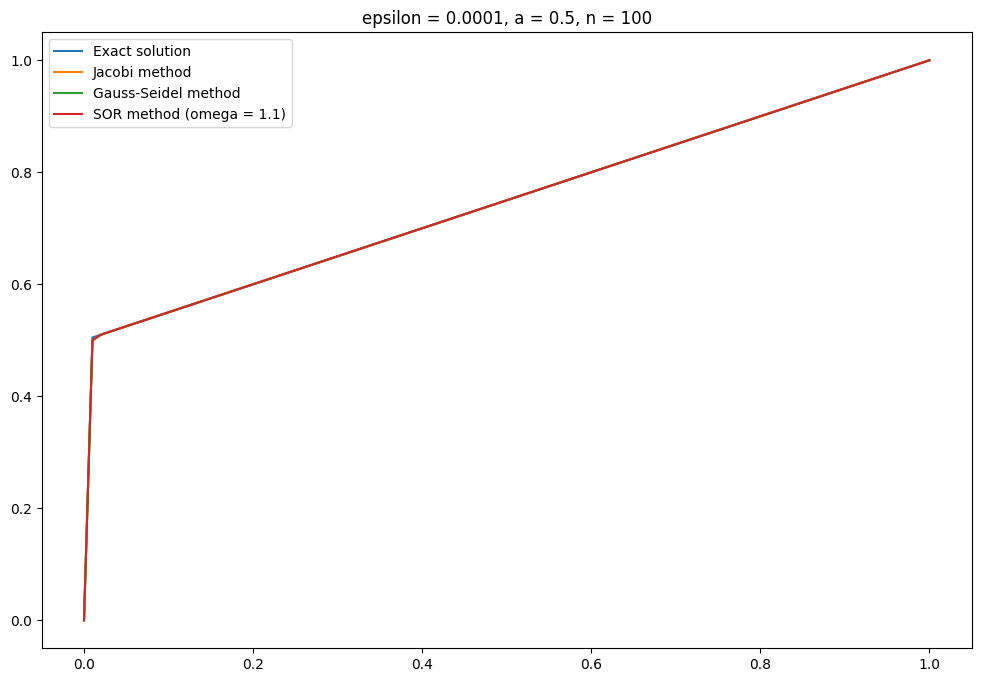

In [8]:
func(0.0001, 1/2, 100)


$\varepsilon = 0.0001$ 时，SOR 迭代法当 $\omega \ge 1.2$ 时似乎不收敛。